# Gemaakt op 06/05/2025 door martijn

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st

### Portfolio assignment 9
25 min: Perform a bivariate analysis on the columns with numerical data in the penguins dataset.
- Use corr() on the DataFrame to calculate all the correlations. Use the code example above to show the correlation table with colors.
- Look at the corrrelations. Do they match your expectations?
- Show a scatter plot for:
   - The strongest positive correlation
   - The strongest negative correlation
   - The weakest correlation

In [18]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# my thoughts

ik denk dat er een verband in zal zitten, maar welke weet ik niet.
misschien dat bij een langere bill hij ook dieper wordt?

en bij grotere bill die ook zwaarder wordt?


In [27]:
penguins[['bill_length_mm','bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [28]:
exampleDataCorrelations = penguins.corr(numeric_only=True)
exampleDataCorrelations.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,-0.24,0.66,0.60
bill_depth_mm,-0.24,1.00,-0.58,-0.47
flipper_length_mm,0.66,-0.58,1.00,0.87
body_mass_g,0.60,-0.47,0.87,1.00


<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

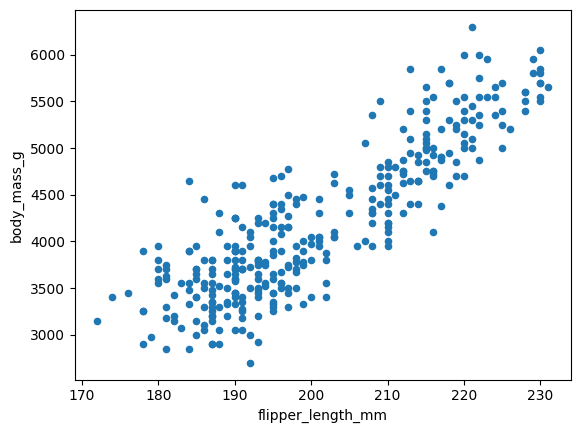

In [33]:
penguins.plot(kind='scatter', x='flipper_length_mm', y='body_mass_g')


bij diepte in combi met lengte van de bill is er niet echt een correlatie. dit verbaast me.
maar bij de flipper lengte is e wel een correlatie met het gewicht. en dat had ik dan weer wel goed :3
(je ziet dat er een correlatie is de verder het getal bij de 0 vandaan is, bij -0.7 en 0.7 is er wel wat correlatie, waarbij -0.3 en 0.3 dat eigenlijk niet is.